In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# 避免画图出现字体警告
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

"""基本信息分析"""

# 基本路径信息
path_format1_user_info = 'data_source/data_format1/user_info_format1.csv'   # 路径自己改
path_format1_user_log = 'data_source/data_format1/user_log_format1.csv'
path_format1_train = 'data_source/data_format1/train_format1.csv'
path_format1_test = 'data_source/data_format1/test_format1.csv'
path_format2_train = 'data_source/data_format2/train_format2.csv'
path_format2_test = 'data_source/data_format2/test_format2.csv'

# 去除数据冗余的函数，用于进行数据分析和去冗余

def drop_duplicated_pd_data(data, column):
    """去除dataframe中的重复数据"""
    if np.sum(data.loc[:, column].duplicated()) != 0:
        print('the dataframe is duplicated!')
        independent_data = data.drop_duplicates(subset=[column], keep='first')
        return independent_data
    else:
        print('the dataframe is independent!')
        return data

def drop_duplicated_series_data(data):
    """去除series中的重复数据"""
    if np.sum(data.duplicated()) != 0:
        print('the column is duplicated!')
        independent_data = data.drop_duplicates(keep='first')
        return independent_data
    else:
        print('the column is independent!')
        return data

def drop_duplicated_series_data(data):
    """去除series中的重复数据"""
    if np.sum(data.duplicated()) != 0:
        print('the column is duplicated!')
        independent_data = data.drop_duplicates(keep='first')
        return independent_data
    else:
        print('the column is independent!')
        return data

#　读取各文件的数据并检查其完整性
with open(path_format2_train, 'r') as f_origin_train:
    origin_train_data = pd.read_csv(f_origin_train)

with open(path_format2_test, 'r') as f_origin_test:
    origin_test_data = pd.read_csv(f_origin_test)
    
with open (path_format1_train, 'r') as f_split_train:
    split_train_data = pd.read_csv(f_split_train)

with open (path_format1_test, 'r') as f_split_test:
    split_test_data = pd.read_csv(f_split_test)

with open(path_format1_user_info, 'r') as f_user_info:           
    user_info = pd.read_csv(f_user_info)

with open(path_format1_user_log, 'r') as f_user_log:
    user_log = pd.read_csv(f_user_log)

    
# 原始数据长度
print('原始数据的长度为:')
print(origin_train_data.shape, split_train_data.shape, split_test_data.shape, user_info.shape, user_log.shape)

原始数据的长度为:
(7030723, 6) (260864, 3) (261477, 3) (424170, 3) (54925330, 7)


In [2]:
# 分析一下train_format_1中的数据和train_format_2中的数据的差别

# 从user_id的角度
inde_origin_train_data_user_id = drop_duplicated_series_data(origin_train_data['user_id'])
inde_origin_test_data_user_id = drop_duplicated_series_data(origin_test_data['user_id'])
inde_split_train_data_user_id = drop_duplicated_series_data(split_train_data['user_id'])
inde_split_test_data_user_id = drop_duplicated_series_data(split_test_data['user_id'])

# 验证format1中的数据确实是由format2一一拆分出来的
if set(np.concatenate((inde_split_train_data_user_id, inde_split_test_data_user_id))) == set(np.concatenate((inde_origin_train_data_user_id, inde_origin_test_data_user_id))):
    print('format1中的数据与format2中的数据是完全一致的')

# 从merchant_id的角度
inde_origin_train_data_merchant_id = drop_duplicated_series_data(origin_train_data['merchant_id'])
inde_origin_test_data_merchant_id = drop_duplicated_series_data(origin_test_data['merchant_id'])
inde_user_log_merchant_id = drop_duplicated_series_data(user_log['seller_id'])
inde_split_train_data_merchant_id = drop_duplicated_series_data(split_train_data['merchant_id'])
inde_split_test_data_merchant_id = drop_duplicated_series_data(split_test_data['merchant_id'])

# 从merchant_id的角度进行分析

# 验证user_log中提供了更多的数据供用户进行分析
if set(np.concatenate((inde_split_train_data_merchant_id, inde_split_test_data_merchant_id))) != set(inde_user_log_merchant_id):
    print('user_log中包含了其他的数据')

# 验证这些数据就是label = -1的数据
if set(np.concatenate((inde_origin_train_data_merchant_id, inde_origin_test_data_merchant_id))) == set(inde_user_log_merchant_id):
    print('user_log中包含的其他数据就是label=-1的数据')

# 验证用来train和test的商家只是其中的一部分
if set(np.concatenate((inde_split_train_data_merchant_id, inde_split_test_data_merchant_id))) != set(inde_user_log_merchant_id):
    print('上述的猜测是完全正确的')

print(len(inde_split_train_data_user_id), 
      len(inde_split_test_data_user_id), 
      len(inde_origin_train_data_user_id), 
      len(inde_origin_test_data_user_id))
print(len(inde_split_train_data_merchant_id), 
      len(inde_split_test_data_merchant_id), 
      len(inde_origin_train_data_merchant_id), 
      len(inde_origin_test_data_merchant_id), 
      len(inde_user_log_merchant_id))          

the column is duplicated!
the column is duplicated!
the column is duplicated!
the column is duplicated!
format1中的数据与format2中的数据是完全一致的
the column is duplicated!
the column is duplicated!
the column is duplicated!
the column is duplicated!
the column is duplicated!
user_log中包含了其他的数据
user_log中包含的其他数据就是label=-1的数据
上述的猜测是完全正确的
212062 212108 212062 212108
1993 1993 4995 4995 4995


In [3]:
# 若不进行上述的某一部分数据的测试，请自行进行删除
del origin_train_data
del origin_test_data
del inde_split_train_data_user_id, 
del inde_split_test_data_user_id 
del inde_origin_train_data_user_id 
del inde_origin_test_data_user_id
del inde_split_train_data_merchant_id
del inde_split_test_data_merchant_id
del inde_origin_train_data_merchant_id
del inde_origin_test_data_merchant_id
del inde_user_log_merchant_id


In [4]:
# 将缺失值用一个特定的值进行代替，方便进行数据处理

# 处理user_info中的缺失值，并用-1代替
user_info['age_range'].replace(0.0, np.nan, inplace=True)
print(np.sum(user_info['age_range'].isnull()))
user_info['age_range'].replace(np.nan,-1, inplace=True)
user_info['gender'].replace(2.0, np.nan, inplace=True)
print(np.sum(user_info['gender'].isnull()))
user_info['gender'].replace(np.nan, -1, inplace=True)

# 处理user_log中的缺失值，并用-1代替
print(np.sum(user_log.isnull(), axis=0))
user_log['brand_id'].replace(np.nan, -1,inplace=True)

95131
16862
user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64


In [5]:
# 减小内存存储方便数据存储和处理

# 对split_train_data的处理
split_train_data['user_id'] = split_train_data['user_id'].astype('int32')
split_train_data['merchant_id'] = split_train_data['merchant_id'].astype('int32')
split_train_data['label'] = split_train_data['label'].astype('int8')

# 对split_test_data的处理
split_test_data['user_id'] = split_test_data['user_id'].astype('int32')
split_test_data['merchant_id'] = split_test_data['merchant_id'].astype('int32')

# 对user_log的处理
user_log['user_id'] = user_log['user_id'].astype('int32')
user_log['item_id'] = user_log['item_id'].astype('int32')
user_log['cat_id'] = user_log['cat_id'].astype('int32')
user_log['seller_id'] = user_log['seller_id'].astype('int32')
user_log['brand_id'] = user_log['brand_id'].astype('int32')
user_log['time_stamp'] = user_log['time_stamp'].astype('int32')
user_log['action_type'] = user_log['action_type'].astype('int8')

# 对user_info的处理
user_info['user_id'] = user_info['user_id'].astype('int32')
user_info['gender'] = user_info['gender'].astype('int8')
user_info['age_range'] = user_info['age_range'].astype('int8')

# 检查转换数据后的格式
user_info.info()
user_log.info()
split_train_data.info()
split_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int32
age_range    424170 non-null int8
gender       424170 non-null int8
dtypes: int32(1), int8(2)
memory usage: 2.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        int32
item_id        int32
cat_id         int32
seller_id      int32
brand_id       int32
time_stamp     int32
action_type    int8
dtypes: int32(6), int8(1)
memory usage: 1.3 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
user_id        260864 non-null int32
merchant_id    260864 non-null int32
label          260864 non-null int8
dtypes: int32(2), int8(1)
memory usage: 2.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
user_id        261477 non-null int32
merchant_id    2614

用户的年龄缺失值占比为
0.22427564419925974


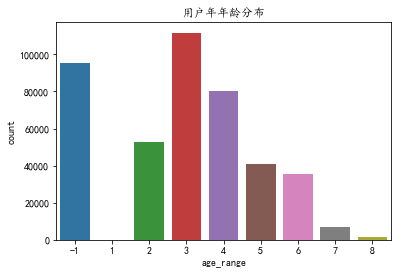

In [156]:
# 进行user_info中的数据分布的预处理分析

# 初步显示user_info中age_range的数据分布
sns.countplot(x = 'age_range', order=[-1, 1, 2, 3, 4, 5, 6, 7, 8], data = user_info)
plt.title('用户年年龄分布')
print('用户的年龄缺失值占比为')
print(user_info[user_info['age_range']== -1]['age_range'].count()/ user_info['age_range'].count())


用户的性别缺失值占比为:
0.03975292925006483


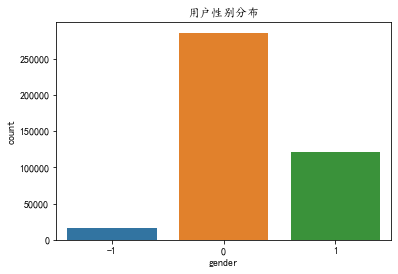

In [157]:
# 初步显示user_info中gender的数据分布
sns.countplot(x = 'gender', order = [-1, 0, 1], data = user_info)
plt.title('用户性别分布')
print('用户的性别缺失值占比为:')
print(user_info[user_info['gender'] == -1]['gender'].count() / user_info['gender'].count())

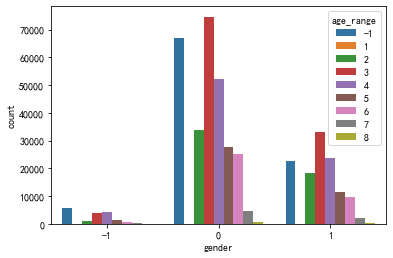

In [158]:
# gender和age的联合显示比较
sns.countplot(x = 'gender', order = [-1, 0 ,1], hue = 'age_range', data = user_info)

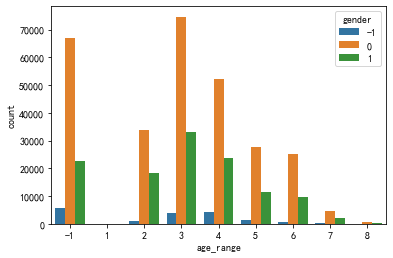

In [159]:
# gender和age的联合显示比较
sns.countplot(x = 'age_range', order = [-1, 1, 2 ,3 ,4, 5, 6, 7, 8], hue = 'gender', data = user_info)

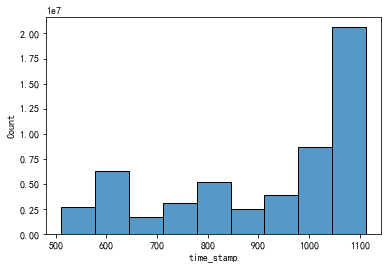

In [160]:
# 进行user_log中的特征分析

# 分析user_log中比较关心的time_stamp
sns.histplot(data=user_log['time_stamp'], bins=9)

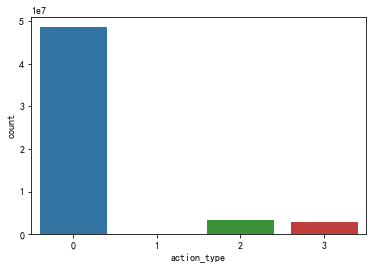

In [161]:
# 分析user_log中的比较关心的action_type
sns.countplot(x = 'action_type', order=[0, 1, 2, 3], data=user_log)

In [6]:
# 用全局的数据特征建立用户的整体画像，包括label=-1和label=1的数据,这里要保证它是可迁移的，这样可以直接对test data做类似的操作

# 等待建立的全局用户特征包含如下：
# 建立用户在所有商家浏览不同商品总数的整体画像
# 建立用户在所有商家浏览不同商品类别数的整体画像
# 建立用户在所有商家的平均浏览天数
# 建立用户在所有商家的平均活动次数
# 建立用户在所有商家的平均单击次数
# 建立用户在所有商家的平均加入购物车次数
# 建立用户在所有商家的平均购买次数
# 建立用户在所有商家的平均加入收藏夹次数
# 建立用户在所有商家的平均购买单击率
# 建立用户在所有商家的平均购买活动率


In [7]:
# 建立用户在所有商家浏览不同商品总数的整体画像
global_user_feature_items = user_log.groupby(['user_id','seller_id','item_id']).count().reset_index()[['user_id','item_id']]
global_user_feature_items = global_user_feature_items.groupby(['user_id']).count().reset_index()
global_user_feature_items.rename(columns={'item_id':'user_items'},inplace=True)
global_user_feature_items.head(10)

,user_id,user_items
0,1,12
1,2,43
2,3,45
3,4,28
4,5,87
5,6,166
6,7,13
7,8,46
8,9,41
9,10,39


In [8]:
# 建立用户在所有商家浏览不同商品类别总数的整体画像
global_user_feature_cats = user_log.groupby(['user_id','seller_id','cat_id']).count().reset_index()[['user_id','cat_id']]
global_user_feature_cats = global_user_feature_cats.groupby(['user_id']).count().reset_index()
global_user_feature_cats.rename(columns={'cat_id':'user_cats'},inplace=True)
global_user_feature_cats.head(10)

,user_id,user_cats
0,1,9
1,2,16
2,3,31
3,4,16
4,5,69
5,6,104
6,7,10
7,8,29
8,9,29
9,10,24


In [9]:
# 建立用户浏览不同商家总数的整体画像
global_user_feature_stores = user_log.groupby(['user_id','seller_id']).count().reset_index()[['user_id','seller_id']]
global_user_feature_stores = global_user_feature_stores.groupby(['user_id']).count().reset_index()
global_user_feature_stores.rename(columns={'seller_id':'user_stores'},inplace=True)
global_user_feature_stores.head(10)

,user_id,user_stores
0,1,9
1,2,14
2,3,23
3,4,12
4,5,56
5,6,79
6,7,6
7,8,23
8,9,23
9,10,17


In [10]:
# 建立用户在各个商家上的浏览总天数的整体画像
global_user_feature_browse_days = user_log.groupby(['user_id','seller_id','time_stamp']).count().reset_index()[['user_id','time_stamp']]
global_user_feature_browse_days = global_user_feature_browse_days.groupby(['user_id']).count().reset_index()
global_user_feature_browse_days.rename(columns={'time_stamp':'user_browse_days'},inplace=True)
global_user_feature_browse_days.head(10)

,user_id,user_browse_days
0,1,10
1,2,14
2,3,26
3,4,17
4,5,84
5,6,102
6,7,9
7,8,32
8,9,34
9,10,24


In [11]:
# 建立用户在所有商家上activity_log的整体画像，对稠密的数据用比例显示，对系数的数据采用原值
global_user_feature_actions = user_log.groupby(['user_id','action_type']).count().reset_index()[['user_id','action_type','item_id']]
global_user_feature_actions.rename(columns={'item_id':'times'},inplace=True)    # 用来统计它乘积倍数的一个属性
global_user_feature_actions.head(10)

,user_id,action_type,times
0,1,0,27
1,1,2,6
2,2,0,47
3,2,2,14
4,2,3,2
5,3,0,63
6,3,2,4
7,3,3,1
8,4,0,49
9,4,2,1


In [12]:
# 建立用户全部单击次数user_clicks的整体画像
global_user_feature_clicks_index = global_user_feature_actions['action_type'] == 0
global_user_feature_actions['user_clicks'] = global_user_feature_clicks_index * global_user_feature_actions['times']
global_user_feature_actions.head(10)

,user_id,action_type,times,user_clicks
0,1,0,27,27
1,1,2,6,0
2,2,0,47,47
3,2,2,14,0
4,2,3,2,0
5,3,0,63,63
6,3,2,4,0
7,3,3,1,0
8,4,0,49,49
9,4,2,1,0


In [13]:
# 建立用户全部加入购物车user_carts的整体画像
global_user_feature_carts_index = global_user_feature_actions['action_type'] == 1
global_user_feature_actions['user_carts'] = global_user_feature_carts_index * global_user_feature_actions['times']
global_user_feature_actions.head(10)

,user_id,action_type,times,user_clicks,user_carts
0,1,0,27,27,0
1,1,2,6,0,0
2,2,0,47,47,0
3,2,2,14,0,0
4,2,3,2,0,0
5,3,0,63,63,0
6,3,2,4,0,0
7,3,3,1,0,0
8,4,0,49,49,0
9,4,2,1,0,0


In [14]:
# 建立用户全部购买user_purchases的整体画像
global_user_feature_purchases_index = global_user_feature_actions['action_type'] == 2
global_user_feature_actions['user_purchases'] = global_user_feature_purchases_index * global_user_feature_actions['times']
global_user_feature_actions.head(10)

,user_id,action_type,times,user_clicks,user_carts,user_purchases
0,1,0,27,27,0,0
1,1,2,6,0,0,6
2,2,0,47,47,0,0
3,2,2,14,0,0,14
4,2,3,2,0,0,0
5,3,0,63,63,0,0
6,3,2,4,0,0,4
7,3,3,1,0,0,0
8,4,0,49,49,0,0
9,4,2,1,0,0,1


In [15]:
# 建立用户全部收藏的user_collections的整体画像
global_user_feature_collections_index = global_user_feature_actions['action_type'] == 3
global_user_feature_actions['user_collections'] = global_user_feature_collections_index * global_user_feature_actions['times']
global_user_feature_actions.head(10)

,user_id,action_type,times,user_clicks,user_carts,user_purchases,user_collections
0,1,0,27,27,0,0,0
1,1,2,6,0,0,6,0
2,2,0,47,47,0,0,0
3,2,2,14,0,0,14,0
4,2,3,2,0,0,0,2
5,3,0,63,63,0,0,0
6,3,2,4,0,0,4,0
7,3,3,1,0,0,0,1
8,4,0,49,49,0,0,0
9,4,2,1,0,0,1,0


In [16]:
# 压缩user_id的特征维度，生成对应于user_id的特征
global_user_feature_actions = global_user_feature_actions.groupby(['user_id']).sum().reset_index()[['user_id','user_clicks','user_carts','user_purchases','user_collections']]
global_user_feature_actions.head(10)

,user_id,user_clicks,user_carts,user_purchases,user_collections
0,1,27,0,6,0
1,2,47,0,14,2
2,3,63,0,4,1
3,4,49,0,1,0
4,5,150,0,13,10
5,6,217,0,17,15
6,7,6,0,8,0
7,8,61,0,23,7
8,9,79,0,4,4
9,10,56,0,7,1


In [17]:
# 建立用户全部点击次数的user_logs特征画像
global_user_feature_actions['user_logs'] = global_user_feature_actions['user_clicks'] + global_user_feature_actions['user_carts'] + global_user_feature_actions['user_purchases'] + global_user_feature_actions['user_collections']
global_user_feature_actions.head(10)

,user_id,user_clicks,user_carts,user_purchases,user_collections,user_logs
0,1,27,0,6,0,33
1,2,47,0,14,2,63
2,3,63,0,4,1,68
3,4,49,0,1,0,50
4,5,150,0,13,10,173
5,6,217,0,17,15,249
6,7,6,0,8,0,14
7,8,61,0,23,7,91
8,9,79,0,4,4,87
9,10,56,0,7,1,64


In [18]:
# 合并所有的用户全局特征
global_user_feature = pd.merge(global_user_feature_items, global_user_feature_cats, left_on='user_id',right_on='user_id',how='left')
global_user_feature = pd.merge(global_user_feature, global_user_feature_stores, left_on='user_id',right_on='user_id',how='left')
global_user_feature = pd.merge(global_user_feature, global_user_feature_browse_days, left_on='user_id',right_on='user_id',how='left')
global_user_feature = pd.merge(global_user_feature, global_user_feature_actions, left_on='user_id', right_on='user_id',how='left')

In [20]:
# 处理生成的用户全局整体画像，把数据多的部分变成比例，其他的不变
global_user_feature['user_items_per_store'] = global_user_feature['user_items'] / global_user_feature['user_stores']
global_user_feature['user_cats_per_store'] = global_user_feature['user_cats'] / global_user_feature['user_stores']
global_user_feature['user_days_per_store'] = global_user_feature['user_browse_days'] / global_user_feature['user_stores']
global_user_feature['user_logs_per_store'] = global_user_feature['user_logs'] / global_user_feature['user_stores']
global_user_feature['user_clicks_per_store'] = global_user_feature['user_clicks'] / global_user_feature['user_stores']
global_user_feature['user_carts_per_store'] = global_user_feature['user_carts'] / global_user_feature['user_stores']
global_user_feature['user_purchases_per_store'] = global_user_feature['user_purchases'] / global_user_feature['user_stores']
global_user_feature['user_collections_per_store'] = global_user_feature['user_collections'] / global_user_feature['user_stores']
global_user_feature['user_click_purchase_ratio'] = global_user_feature['user_clicks'] / global_user_feature['user_purchases']
global_user_feature['user_collection_purchase_ratio'] = global_user_feature['user_collections'] / global_user_feature['user_purchases']
global_user_feature['user_cart_purchase_ratio'] = global_user_feature['user_carts'] / global_user_feature['user_purchases']
global_user_feature['user_log_purchase_ratio'] = global_user_feature['user_logs'] / global_user_feature['user_purchases']


In [21]:
global_user_feature.head(10)

,user_id,user_items,user_cats,user_stores,user_browse_days,user_clicks,user_carts,user_purchases,user_collections,user_logs,...,user_days_per_store,user_logs_per_store,user_clicks_per_store,user_carts_per_store,user_purchases_per_store,user_collections_per_store,user_click_purchase_ratio,user_collection_purchase_ratio,user_cart_purchase_ratio,user_log_purchase_ratio
0,1,12,9,9,10,27,0,6,0,33,...,1.111111,3.666667,3.000000,0.0,0.666667,0.000000,4.500000,0.000000,0.0,5.500000
1,2,43,16,14,14,47,0,14,2,63,...,1.000000,4.500000,3.357143,0.0,1.000000,0.142857,3.357143,0.142857,0.0,4.500000
2,3,45,31,23,26,63,0,4,1,68,...,1.130435,2.956522,2.739130,0.0,0.173913,0.043478,15.750000,0.250000,0.0,17.000000
3,4,28,16,12,17,49,0,1,0,50,...,1.416667,4.166667,4.083333,0.0,0.083333,0.000000,49.000000,0.000000,0.0,50.000000
4,5,87,69,56,84,150,0,13,10,173,...,1.500000,3.089286,2.678571,0.0,0.232143,0.178571,11.538462,0.769231,0.0,13.307692
5,6,166,104,79,102,217,0,17,15,249,...,1.291139,3.151899,2.746835,0.0,0.215190,0.189873,12.764706,0.882353,0.0,14.647059
6,7,13,10,6,9,6,0,8,0,14,...,1.500000,2.333333,1.000000,0.0,1.333333,0.000000,0.750000,0.000000,0.0,1.750000
7,8,46,29,23,32,61,0,23,7,91,...,1.391304,3.956522,2.652174,0.0,1.000000,0.304348,2.652174,0.304348,0.0,3.956522
8,9,41,29,23,34,79,0,4,4,87,...,1.478261,3.782609,3.434783,0.0,0.173913,0.173913,19.750000,1.000000,0.0,21.750000
9,10,39,24,17,24,56,0,7,1,64,...,1.411765,3.764706,3.294118,0.0,0.411765,0.058824,8.000000,0.142857,0.0,9.142857


In [22]:
# 检测全局的用户特征是否有误
print(np.sum(global_user_feature[np.isinf(global_user_feature)]['user_click_purchase_ratio']))
print(np.sum(global_user_feature[np.isinf(global_user_feature)]['user_click_purchase_ratio']))
print(np.sum(global_user_feature[np.isinf(global_user_feature)]['user_cart_purchase_ratio']))
print(np.sum(global_user_feature[np.isinf(global_user_feature)]['user_log_purchase_ratio']))
print(np.sum(global_user_feature.isnull()))

0.0
0.0
0.0
0.0
user_id                           0
user_items                        0
user_cats                         0
user_stores                       0
user_browse_days                  0
user_clicks                       0
user_carts                        0
user_purchases                    0
user_collections                  0
user_logs                         0
user_items_per_store              0
user_cats_per_store               0
user_days_per_store               0
user_logs_per_store               0
user_clicks_per_store             0
user_carts_per_store              0
user_purchases_per_store          0
user_collections_per_store        0
user_click_purchase_ratio         0
user_collection_purchase_ratio    0
user_cart_purchase_ratio          0
user_log_purchase_ratio           0
dtype: int64


In [23]:
# 删除上述生成的大量值

del global_user_feature_actions
del global_user_feature_items
del global_user_feature_cats
del global_user_feature_stores
del global_user_feature_browse_days

In [24]:
# 建立全局的商家画像
# 主要等待建立的商家全局画像有如下：
# 1.商家平均被用户浏览的不同商品的总个数
# 2.商家平均被用户浏览的不同商品的总类别数
# 3.商家平均被用户浏览的不同品牌的总类别数
# 4.商家平均被用户浏览的天数
# 5.商家平均被用户交互的次数
# 6.商家平均被用户点击的次数
# 7.商家平均被用户加入购物车的次数
# 8.商家平均被用户购买的次数
# 9.商家平均被用户收藏的次数
# 10.商家被用户的活动购买比
# 11.商家被用户的点击购买比

In [25]:
# 建立商家含有的不同商品的个数整体画像
global_merchant_feature_items = user_log.groupby(['user_id','seller_id','item_id']).count().reset_index()[['seller_id','item_id']]
global_merchant_feature_items = global_merchant_feature_items.groupby(['seller_id']).count().reset_index()
global_merchant_feature_items.rename(columns={'item_id':'merchant_items'},inplace=True)
global_merchant_feature_items.head(10)

,seller_id,merchant_items
0,1,202327
1,2,1285
2,3,1748
3,4,1951
4,5,5684
5,6,969
6,7,2178
7,8,2432
8,9,1432
9,10,11648


In [26]:
# 建立商家含有的不同商品类别个数的整体画像
global_merchant_feature_cats = user_log.groupby(['user_id','seller_id','cat_id']).count().reset_index()[['seller_id','cat_id']]
global_merchant_feature_cats = global_merchant_feature_cats.groupby(['seller_id']).count().reset_index()
global_merchant_feature_cats.rename(columns={'cat_id':'merchant_cats'},inplace=True)
global_merchant_feature_cats.head(10)

,seller_id,merchant_cats
0,1,77701
1,2,1053
2,3,1170
3,4,1562
4,5,4051
5,6,688
6,7,1701
7,8,1510
8,9,1115
9,10,7169


In [28]:
# 在构建具有商家的品牌特征时，填补它的缺失值,提取缺失部分
user_log['brand_id'].replace(-1, np.nan, inplace=True)
missing_brand_id = user_log[user_log['brand_id'].isnull()][['user_id','seller_id']].sort_index()
missing_brand_id.head(10)

,user_id,seller_id
4429,198759,2242
10494,398807,2791
11189,289429,3139
11334,244974,1503
11336,244974,1503
11339,244974,1503
11340,244974,1503
12507,332896,4424
13271,378206,1102
13272,378206,4282


In [29]:
# 从统计信息中取出相同的特征
global_merchant_feature_brands = user_log.groupby(['seller_id','brand_id']).count().reset_index()[['seller_id','brand_id','item_id']]
global_merchant_feature_brands = global_merchant_feature_brands.sort_values('item_id',ascending=True).drop_duplicates(['seller_id'],keep='last').sort_index()
missing_brand_id = pd.merge(missing_brand_id, global_merchant_feature_brands, left_on='seller_id', right_on='seller_id', how='left')
missing_brand_id.drop(columns = ['item_id'], inplace=True)
# 将缺失值填充回原数据
mask = user_log['brand_id'].isnull()
user_log.loc[mask,'brand_id'] = missing_brand_id['brand_id'].values

In [30]:
# 商家含有的不同商品品牌个数的整体画像,填补以后统计关于商品的缺失值
global_merchant_feature_brands = user_log.groupby(['user_id','seller_id','brand_id']).count().reset_index()[['seller_id','brand_id']]
global_merchant_feature_brands = global_merchant_feature_brands.groupby(['seller_id']).count().reset_index()
global_merchant_feature_brands.rename(columns={'brand_id':'merchant_brands'},inplace=True)
global_merchant_feature_brands.head(10)

,seller_id,merchant_brands
0,1,32576
1,2,936
2,3,1136
3,4,1483
4,5,3652
5,6,660
6,7,1675
7,8,1239
8,9,1189
9,10,6435


In [31]:
# 商家被不同用户浏览的总天数的整体画像
global_merchant_feature_browse_days = user_log.groupby(['user_id','seller_id','time_stamp']).count().reset_index()[['seller_id','time_stamp']]
global_merchant_feature_browse_days = global_merchant_feature_browse_days.groupby(['seller_id']).count().reset_index()
global_merchant_feature_browse_days.rename(columns={'time_stamp':'merchant_days'},inplace=True)
global_merchant_feature_browse_days.head(10)

,seller_id,merchant_days
0,1,63839
1,2,1131
2,3,1391
3,4,1669
4,5,4330
5,6,789
6,7,1902
7,8,1560
8,9,1130
9,10,6862


In [32]:
# 建立商家被不同用户访问总数的整体画像
global_merchant_feature_users = user_log.groupby(['user_id','seller_id']).count().reset_index()[['user_id','seller_id']]
global_merchant_feature_users = global_merchant_feature_users.groupby(['seller_id']).count().reset_index()
global_merchant_feature_users.rename(columns={'user_id':'merchant_users'},inplace=True)
global_merchant_feature_users.head(10)

,seller_id,merchant_users
0,1,30796
1,2,936
2,3,1136
3,4,1481
4,5,3652
5,6,659
6,7,1608
7,8,1239
8,9,941
9,10,5517


In [33]:
# 建立商家在所有用户上activity_log的整体画像，对稠密的数据用比例显示，对系数的数据采用原值
global_merchant_feature_actions = user_log.groupby(['seller_id','action_type']).count().reset_index()[['seller_id','action_type','item_id']]
global_merchant_feature_actions.rename(columns={'item_id':'times'},inplace=True)    # 用来统计它倍乘的一个属性
global_merchant_feature_actions.head(10)

,seller_id,action_type,times
0,1,0,308236
1,1,1,444
2,1,2,17705
3,1,3,12755
4,2,0,2030
5,2,1,8
6,2,2,189
7,2,3,144
8,3,0,2399
9,3,1,4


In [34]:
# 建立商家全部被单击次数merchant_clicks的整体画像
global_merchant_feature_clicks_index = global_merchant_feature_actions['action_type'] == 0
global_merchant_feature_actions['merchant_clicks'] = global_merchant_feature_clicks_index * global_merchant_feature_actions['times']
global_merchant_feature_actions.head(10)

,seller_id,action_type,times,merchant_clicks
0,1,0,308236,308236
1,1,1,444,0
2,1,2,17705,0
3,1,3,12755,0
4,2,0,2030,2030
5,2,1,8,0
6,2,2,189,0
7,2,3,144,0
8,3,0,2399,2399
9,3,1,4,0


In [35]:
# 建立商家全部被加入购物车次数merchant_carts的整体画像
global_merchant_feature_carts_index = global_merchant_feature_actions['action_type'] == 1
global_merchant_feature_actions['merchant_carts'] = global_merchant_feature_carts_index * global_merchant_feature_actions['times']
global_merchant_feature_actions.head(10)

,seller_id,action_type,times,merchant_clicks,merchant_carts
0,1,0,308236,308236,0
1,1,1,444,0,444
2,1,2,17705,0,0
3,1,3,12755,0,0
4,2,0,2030,2030,0
5,2,1,8,0,8
6,2,2,189,0,0
7,2,3,144,0,0
8,3,0,2399,2399,0
9,3,1,4,0,4


In [36]:
# 建立商家全部被购买的merchant_purchases的整体画像
global_merchant_feature_purchases_index = global_merchant_feature_actions['action_type'] == 2
global_merchant_feature_actions['merchant_purchases'] = global_merchant_feature_purchases_index * global_merchant_feature_actions['times']
global_merchant_feature_actions.head(10)

,seller_id,action_type,times,merchant_clicks,merchant_carts,merchant_purchases
0,1,0,308236,308236,0,0
1,1,1,444,0,444,0
2,1,2,17705,0,0,17705
3,1,3,12755,0,0,0
4,2,0,2030,2030,0,0
5,2,1,8,0,8,0
6,2,2,189,0,0,189
7,2,3,144,0,0,0
8,3,0,2399,2399,0,0
9,3,1,4,0,4,0


In [37]:
# 建立商家全部被收藏的merchant_collections的整体画像
global_merchant_feature_collections_index = global_merchant_feature_actions['action_type'] == 3
global_merchant_feature_actions['merchant_collections'] = global_merchant_feature_collections_index * global_merchant_feature_actions['times']
global_merchant_feature_actions.head(10)

,seller_id,action_type,times,merchant_clicks,merchant_carts,merchant_purchases,merchant_collections
0,1,0,308236,308236,0,0,0
1,1,1,444,0,444,0,0
2,1,2,17705,0,0,17705,0
3,1,3,12755,0,0,0,12755
4,2,0,2030,2030,0,0,0
5,2,1,8,0,8,0,0
6,2,2,189,0,0,189,0
7,2,3,144,0,0,0,144
8,3,0,2399,2399,0,0,0
9,3,1,4,0,4,0,0


In [38]:
# 压缩seller_id的特征维度，生成对应于seller_id的特征
global_merchant_feature_actions = global_merchant_feature_actions.groupby(['seller_id']).sum().reset_index()[['seller_id','merchant_clicks','merchant_carts','merchant_purchases','merchant_collections']]
global_merchant_feature_actions.head(10)

,seller_id,merchant_clicks,merchant_carts,merchant_purchases,merchant_collections
0,1,308236,444,17705,12755
1,2,2030,8,189,144
2,3,2399,4,67,175
3,4,2646,2,294,164
4,5,7483,9,144,556
5,6,1390,6,82,120
6,7,3521,7,399,179
7,8,3540,3,395,306
8,9,2096,7,94,65
9,10,19125,64,1133,866


In [39]:
# 建立商家全部被活动的merchant_logs总画像
global_merchant_feature_actions['merchant_logs'] = global_merchant_feature_actions['merchant_clicks'] + global_merchant_feature_actions['merchant_carts'] + global_merchant_feature_actions['merchant_purchases'] + global_merchant_feature_actions['merchant_collections']
global_merchant_feature_actions.head(10)

,seller_id,merchant_clicks,merchant_carts,merchant_purchases,merchant_collections,merchant_logs
0,1,308236,444,17705,12755,339140
1,2,2030,8,189,144,2371
2,3,2399,4,67,175,2645
3,4,2646,2,294,164,3106
4,5,7483,9,144,556,8192
5,6,1390,6,82,120,1598
6,7,3521,7,399,179,4106
7,8,3540,3,395,306,4244
8,9,2096,7,94,65,2262
9,10,19125,64,1133,866,21188


In [40]:
# 合成商家全局的特征向量
global_merchant_feature = pd.merge(global_merchant_feature_items, global_merchant_feature_cats, left_on='seller_id',right_on='seller_id',how='left')
global_merchant_feature = pd.merge(global_merchant_feature, global_merchant_feature_brands, left_on = 'seller_id', right_on='seller_id', how='left')
global_merchant_feature = pd.merge(global_merchant_feature, global_merchant_feature_browse_days, left_on = 'seller_id', right_on='seller_id', how='left')
global_merchant_feature = pd.merge(global_merchant_feature, global_merchant_feature_users, left_on ='seller_id', right_on='seller_id', how='left')
global_merchant_feature = pd.merge(global_merchant_feature, global_merchant_feature_actions, left_on='seller_id', right_on='seller_id', how='left')
global_merchant_feature.head(10)

,seller_id,merchant_items,merchant_cats,merchant_brands,merchant_days,merchant_users,merchant_clicks,merchant_carts,merchant_purchases,merchant_collections,merchant_logs
0,1,202327,77701,32576,63839,30796,308236,444,17705,12755,339140
1,2,1285,1053,936,1131,936,2030,8,189,144,2371
2,3,1748,1170,1136,1391,1136,2399,4,67,175,2645
3,4,1951,1562,1483,1669,1481,2646,2,294,164,3106
4,5,5684,4051,3652,4330,3652,7483,9,144,556,8192
5,6,969,688,660,789,659,1390,6,82,120,1598
6,7,2178,1701,1675,1902,1608,3521,7,399,179,4106
7,8,2432,1510,1239,1560,1239,3540,3,395,306,4244
8,9,1432,1115,1189,1130,941,2096,7,94,65,2262
9,10,11648,7169,6435,6862,5517,19125,64,1133,866,21188


In [41]:
# 对稠密的特征建立比例的特征矢量，而对稀疏的特征则保留原样
global_merchant_feature['merchant_items_per_user'] = global_merchant_feature['merchant_items'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_cats_per_user'] = global_merchant_feature['merchant_cats'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_brands_per_user'] = global_merchant_feature['merchant_brands'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_days_per_user'] = global_merchant_feature['merchant_days'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_clicks_per_user'] = global_merchant_feature['merchant_clicks'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_carts_per_user'] = global_merchant_feature['merchant_carts'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_purchases_per_user'] = global_merchant_feature['merchant_purchases'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_collections_per_user'] = global_merchant_feature['merchant_collections'] / global_merchant_feature['merchant_users']
global_merchant_feature['merchant_click_purchase_ratio'] = global_merchant_feature['merchant_clicks'] / global_merchant_feature['merchant_purchases']
global_merchant_feature['merchant_collection_purchase_ratio'] = global_merchant_feature['merchant_collections'] / global_merchant_feature['merchant_purchases']
global_merchant_feature['merchant_cart_purchase_ratio'] = global_merchant_feature['merchant_carts'] / global_merchant_feature['merchant_purchases']
global_merchant_feature['merchant_log_purchase_ratio'] = global_merchant_feature['merchant_logs'] / global_merchant_feature['merchant_purchases']

In [42]:
# 检验特征是否取值正确
print(np.sum(global_merchant_feature[np.isinf(global_user_feature)]['merchant_click_purchase_ratio']))
print(np.sum(global_merchant_feature[np.isinf(global_user_feature)]['merchant_collection_purchase_ratio']))
print(np.sum(global_merchant_feature[np.isinf(global_user_feature)]['merchant_cart_purchase_ratio']))
print(np.sum(global_merchant_feature[np.isinf(global_user_feature)]['merchant_log_purchase_ratio']))
print(np.sum(global_merchant_feature.isnull()))

0.0
0.0
0.0
0.0
seller_id                             0
merchant_items                        0
merchant_cats                         0
merchant_brands                       0
merchant_days                         0
merchant_users                        0
merchant_clicks                       0
merchant_carts                        0
merchant_purchases                    0
merchant_collections                  0
merchant_logs                         0
merchant_items_per_user               0
merchant_cats_per_user                0
merchant_brands_per_user              0
merchant_days_per_user                0
merchant_clicks_per_user              0
merchant_carts_per_user               0
merchant_purchases_per_user           0
merchant_collections_per_user         0
merchant_click_purchase_ratio         0
merchant_collection_purchase_ratio    0
merchant_cart_purchase_ratio          0
merchant_log_purchase_ratio           0
dtype: int64


In [43]:
# 重命名校正seller_id的属性
global_merchant_feature.rename(columns={'seller_id':'merchant_id'},inplace=True)
global_merchant_feature.head(10)

,merchant_id,merchant_items,merchant_cats,merchant_brands,merchant_days,merchant_users,merchant_clicks,merchant_carts,merchant_purchases,merchant_collections,...,merchant_brands_per_user,merchant_days_per_user,merchant_clicks_per_user,merchant_carts_per_user,merchant_purchases_per_user,merchant_collections_per_user,merchant_click_purchase_ratio,merchant_collection_purchase_ratio,merchant_cart_purchase_ratio,merchant_log_purchase_ratio
0,1,202327,77701,32576,63839,30796,308236,444,17705,12755,...,1.057800,2.072964,10.008962,0.014417,0.574912,0.414177,17.409545,0.720418,0.025078,19.155041
1,2,1285,1053,936,1131,936,2030,8,189,144,...,1.000000,1.208333,2.168803,0.008547,0.201923,0.153846,10.740741,0.761905,0.042328,12.544974
2,3,1748,1170,1136,1391,1136,2399,4,67,175,...,1.000000,1.224472,2.111796,0.003521,0.058979,0.154049,35.805970,2.611940,0.059701,39.477612
3,4,1951,1562,1483,1669,1481,2646,2,294,164,...,1.001350,1.126941,1.786631,0.001350,0.198515,0.110736,9.000000,0.557823,0.006803,10.564626
4,5,5684,4051,3652,4330,3652,7483,9,144,556,...,1.000000,1.185652,2.049014,0.002464,0.039430,0.152245,51.965278,3.861111,0.062500,56.888889
5,6,969,688,660,789,659,1390,6,82,120,...,1.001517,1.197269,2.109256,0.009105,0.124431,0.182094,16.951220,1.463415,0.073171,19.487805
6,7,2178,1701,1675,1902,1608,3521,7,399,179,...,1.041667,1.182836,2.189677,0.004353,0.248134,0.111318,8.824561,0.448622,0.017544,10.290727
7,8,2432,1510,1239,1560,1239,3540,3,395,306,...,1.000000,1.259080,2.857143,0.002421,0.318805,0.246973,8.962025,0.774684,0.007595,10.744304
8,9,1432,1115,1189,1130,941,2096,7,94,65,...,1.263549,1.200850,2.227418,0.007439,0.099894,0.069075,22.297872,0.691489,0.074468,24.063830
9,10,11648,7169,6435,6862,5517,19125,64,1133,866,...,1.166395,1.243792,3.466558,0.011601,0.205365,0.156969,16.879965,0.764342,0.056487,18.700794


In [44]:
# 构建商家关于性别和年龄的特征，由于性别和年龄的缺失较多，这里只用非缺失值进行预估，大约有一千万的数据，只有4995个商家，还是很充足的

# 只用非缺失值预估，筛选出对应的数据
user_info['age_range'].replace(-1, np.nan, inplace=True)
user_info['gender'].replace(-1, np.nan, inplace=True)
mask_age_gender = ~(np.sum(user_info.isnull(),axis=1) > 0)
user_info_process = user_info.loc[mask_age_gender, :]

In [45]:
global_merchant_feature_users = user_log.groupby(['user_id','seller_id']).count().reset_index()[['user_id','seller_id','item_id']]
# counts表达的是统计次数的意思,即记录一个用户在这个商家的多次操作
global_merchant_feature_users.rename(columns={'item_id':'counts'},inplace=True)   

In [46]:
# 取得全局待操作特征
user_info_overall = pd.merge(user_info_process, global_merchant_feature_users, left_on='user_id',right_on='user_id',how='left')
user_info_overall.head(10)

,user_id,age_range,gender,seller_id,counts
0,376517,6.0,1.0,199,1
1,376517,6.0,1.0,542,1
2,376517,6.0,1.0,547,13
3,376517,6.0,1.0,573,5
4,376517,6.0,1.0,1065,1
5,376517,6.0,1.0,1073,2
6,376517,6.0,1.0,1529,1
7,376517,6.0,1.0,1609,18
8,376517,6.0,1.0,1804,1
9,376517,6.0,1.0,2445,5


In [47]:
global_merchant_feature_gender = user_info_overall.groupby(['gender','seller_id']).sum().reset_index()[['gender','seller_id','counts']]
global_merchant_feature_gender.head(10)

,gender,seller_id,counts
0,0.0,1,202440
1,0.0,2,1278
2,0.0,3,1695
3,0.0,4,1791
4,0.0,5,5107
5,0.0,6,875
6,0.0,7,2272
7,0.0,8,3161
8,0.0,9,739
9,0.0,10,8723


In [48]:
# 组建关于商家的性别全局性别特征(它表达的是有百分之多少的男性用户访问这家店)

# 统计商家被不同性别用户的访问总数
global_merchant_feature_gender = user_info_overall.groupby(['gender','seller_id']).sum().reset_index()[['gender','seller_id','counts']]

# 统计商家被所有用户的访问总数
global_merchant_feature_gender1 = global_merchant_feature_gender.groupby(['seller_id']).sum().reset_index()[['seller_id','counts']]

# 定义乘积因子加权求和
global_merchant_feature_gender['times'] = global_merchant_feature_gender['gender'] * global_merchant_feature_gender['counts']

# 算得每个商家被访问的所有性别总和
global_merchant_feature_gender = global_merchant_feature_gender.groupby(['seller_id']).sum().reset_index()[['seller_id','times']]

# 生成每个商家被访问的性别特征
global_merchant_feature['merchant_gender'] = global_merchant_feature_gender['times'].values / global_merchant_feature_gender1['counts'].values

In [49]:
# 组件关于商家的年龄全局特征(它表达的是访问这家店的平均年龄范围)

# 取出年龄的全局特征
global_merchant_feature_age = user_info_overall.groupby(['age_range','seller_id','counts']).sum().reset_index()[['age_range','seller_id','counts']]

# 定义乘积因子
global_merchant_feature_age['times'] = global_merchant_feature_age['age_range'] * global_merchant_feature_age['counts']

# 计算商家被所有用户访问的年龄总和
global_merchant_feature_age1 = global_merchant_feature_age.groupby(['seller_id']).sum().reset_index()[['seller_id','times']]

# 计算用户被所有商家访问的次数
global_merchant_feature_age= global_merchant_feature_age.groupby(['seller_id']).sum().reset_index()[['seller_id','counts']]

# 生成每个商家被访问的年龄特征
global_merchant_feature['avg_gender'] = global_merchant_feature_age1['times'].values / global_merchant_feature_age['counts'].values

In [50]:
# 删除上述生成的大量值
del user_info_process
del user_info_overall
del global_merchant_feature_gender
del global_merchant_feature_gender1
del global_merchant_feature_age
del global_merchant_feature_age1
del global_merchant_feature_actions
del global_merchant_feature_brands
del global_merchant_feature_browse_days
del global_merchant_feature_cats
del global_merchant_feature_items
del global_merchant_feature_users

In [163]:
# 建立某一个用户针对特定商家的特定画像
# 主要等待建立的商家全局画像有如下：
# 1.用户在指定商家中浏览的商品总数的特定画像
# 2.用户在指定商家中浏览的商品类别数的特定画像
# 3.用户在指定商家中浏览的商品品牌数的特定画像
# 4.用户在指定商家中浏览了几天的特定画像
# 5.用户在指定商家中的总操作数的特定画像
# 6.用户在指定商家中的单击总量的特定画像
# 7.用户在指定商家中的加入购物车总量的特定画像
# 8.用户在指定商家中的购买总量的特定画像
# 9.用户在指定商家中的加入收藏夹总量的特定画像

In [51]:
# 1.建立用户在一个商家浏览商品总数的特定画像

user_merchant_feature_items = user_log.groupby(['user_id', 'seller_id', 'item_id']).count().reset_index()[['user_id','seller_id','item_id']]
user_merchant_feature_items = user_merchant_feature_items.groupby(['user_id', 'seller_id']).count().reset_index()
user_merchant_feature_items.rename(columns={'item_id':'user_merchant_items'},inplace=True)
user_merchant_feature_items.head(10)

,user_id,seller_id,user_merchant_items
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [52]:
# 2.建立用户在一个商家浏览商品类别数的特定画像

user_merchant_feature_cats = user_log.groupby(['user_id', 'seller_id', 'cat_id']).count().reset_index()[['user_id','seller_id','cat_id']]
user_merchant_feature_cats = user_merchant_feature_cats.groupby(['user_id', 'seller_id']).count().reset_index()
user_merchant_feature_cats.rename(columns={'cat_id':'user_merchant_cats'},inplace=True)
user_merchant_feature_cats.head(10)

,user_id,seller_id,user_merchant_cats
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [53]:
# 3.建立用户在一个商家浏览商品品牌数的特定画像
user_merchant_feature_brands = user_log.groupby(['user_id', 'seller_id', 'brand_id']).count().reset_index()[['user_id','seller_id','brand_id']]
user_merchant_feature_brands = user_merchant_feature_brands.groupby(['user_id', 'seller_id']).count().reset_index()
user_merchant_feature_brands.rename(columns={'brand_id':'user_merchant_brands'},inplace=True)
user_merchant_feature_brands.head(10)

,user_id,seller_id,user_merchant_brands
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [54]:
# 4. 建立用户在一个商家浏览的天数的特定画像
user_merchant_feature_days = user_log.groupby(['user_id', 'seller_id', 'time_stamp']).count().reset_index()[['user_id','seller_id','time_stamp']]
user_merchant_feature_days = user_merchant_feature_days.groupby(['user_id', 'seller_id']).count().reset_index()
user_merchant_feature_days.rename(columns={'time_stamp':'user_merchant_days'},inplace=True)
user_merchant_feature_days.head(10)

,user_id,seller_id,user_merchant_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [55]:
# 5.建立用户在一个商家actions整体的特定画像
user_merchant_feature_actions = user_log.groupby(['user_id','seller_id','action_type']).count().reset_index()[['user_id', 'seller_id','action_type','item_id']]
user_merchant_feature_actions.rename(columns={'item_id':'times'},inplace=True)
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [56]:
# 6.建立用户在一个商家单击次数的特定画像
user_merchant_clicks_index = user_merchant_feature_actions['action_type'] == 0
user_merchant_feature_actions['user_merchant_clicks'] = user_merchant_clicks_index * user_merchant_feature_actions['times']
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
5,1,1019,2,4,0
6,1,1156,0,1,1
7,1,2245,0,5,5
8,1,4026,0,4,4
9,1,4026,2,1,0


In [57]:
# 7.建立用户在一个商家加入购物车次数的特定画像
user_merchant_carts_index = user_merchant_feature_actions['action_type'] == 1
user_merchant_feature_actions['user_merchant_carts'] = user_merchant_carts_index * user_merchant_feature_actions['times']
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks,user_merchant_carts
0,1,471,0,1,1,0
1,1,739,0,1,1,0
2,1,925,0,3,3,0
3,1,925,2,1,0,0
4,1,1019,0,10,10,0
5,1,1019,2,4,0,0
6,1,1156,0,1,1,0
7,1,2245,0,5,5,0
8,1,4026,0,4,4,0
9,1,4026,2,1,0,0


In [58]:
# 8.建立用户在一个商家购买次数的特定画像
user_merchant_purchases_index = user_merchant_feature_actions['action_type'] == 2
user_merchant_feature_actions['user_merchant_purchases'] = user_merchant_purchases_index * user_merchant_feature_actions['times']
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks,user_merchant_carts,user_merchant_purchases
0,1,471,0,1,1,0,0
1,1,739,0,1,1,0,0
2,1,925,0,3,3,0,0
3,1,925,2,1,0,0,1
4,1,1019,0,10,10,0,0
5,1,1019,2,4,0,0,4
6,1,1156,0,1,1,0,0
7,1,2245,0,5,5,0,0
8,1,4026,0,4,4,0,0
9,1,4026,2,1,0,0,1


In [59]:
# 9.建立用户在一个商家次数的特定画像
user_merchant_collections_index = user_merchant_feature_actions['action_type'] == 3
user_merchant_feature_actions['user_merchant_collections'] = user_merchant_collections_index * user_merchant_feature_actions['times']
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0
5,1,1019,2,4,0,0,4,0
6,1,1156,0,1,1,0,0,0
7,1,2245,0,5,5,0,0,0
8,1,4026,0,4,4,0,0,0
9,1,4026,2,1,0,0,1,0


In [60]:
# 压缩user_id和sell_id的维度
user_merchant_feature_actions = user_merchant_feature_actions.groupby(['user_id','seller_id']).sum().reset_index()
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [61]:
# 10.建立用户在一个商家总交互次数的特定画像
user_merchant_feature_actions['user_merchant_logs'] = user_merchant_feature_actions['user_merchant_clicks'] + user_merchant_feature_actions['user_merchant_carts'] + user_merchant_feature_actions['user_merchant_purchases'] + user_merchant_feature_actions['user_merchant_collections']
user_merchant_feature_actions.head(10)

,user_id,seller_id,action_type,times,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections,user_merchant_logs
0,1,471,0,1,1,0,0,0,1
1,1,739,0,1,1,0,0,0,1
2,1,925,2,4,3,0,1,0,4
3,1,1019,2,14,10,0,4,0,14
4,1,1156,0,1,1,0,0,0,1
5,1,2245,0,5,5,0,0,0,5
6,1,4026,2,5,4,0,1,0,5
7,1,4177,0,1,1,0,0,0,1
8,1,4335,0,1,1,0,0,0,1
9,2,420,2,26,23,0,3,0,26


In [62]:
# 丢掉不需要的特征
user_merchant_feature_actions.columns
user_merchant_feature_actions.drop(columns=['action_type','times'], inplace=True)
user_merchant_feature_actions.head(10)

,user_id,seller_id,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections,user_merchant_logs
0,1,471,1,0,0,0,1
1,1,739,1,0,0,0,1
2,1,925,3,0,1,0,4
3,1,1019,10,0,4,0,14
4,1,1156,1,0,0,0,1
5,1,2245,5,0,0,0,5
6,1,4026,4,0,1,0,5
7,1,4177,1,0,0,0,1
8,1,4335,1,0,0,0,1
9,2,420,23,0,3,0,26


In [63]:
# 合并上述已经生成的特征
user_merchant_feature = pd.merge(user_merchant_feature_items, user_merchant_feature_cats, left_on=['user_id','seller_id'], right_on=['user_id','seller_id'], how='left')
user_merchant_feature = pd.merge(user_merchant_feature, user_merchant_feature_brands, left_on=['user_id','seller_id'], right_on=['user_id','seller_id'], how='left')
user_merchant_feature = pd.merge(user_merchant_feature, user_merchant_feature_days, left_on=['user_id','seller_id'], right_on=['user_id','seller_id'], how='left')
user_merchant_feature = pd.merge(user_merchant_feature, user_merchant_feature_actions, left_on=['user_id','seller_id'], right_on=['user_id','seller_id'], how='left')
user_merchant_feature.head(10)

,user_id,seller_id,user_merchant_items,user_merchant_cats,user_merchant_brands,user_merchant_days,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections,user_merchant_logs
0,1,471,1,1,1,1,1,0,0,0,1
1,1,739,1,1,1,1,1,0,0,0,1
2,1,925,1,1,1,1,3,0,1,0,4
3,1,1019,1,1,1,1,10,0,4,0,14
4,1,1156,1,1,1,1,1,0,0,0,1
5,1,2245,4,1,1,1,5,0,0,0,5
6,1,4026,1,1,1,2,4,0,1,0,5
7,1,4177,1,1,1,1,1,0,0,0,1
8,1,4335,1,1,1,1,1,0,0,0,1
9,2,420,15,2,2,1,23,0,3,0,26


In [64]:
# 改一下merchant_id
user_merchant_feature.rename(columns={'seller_id':'merchant_id'},inplace=True)

In [65]:
# 将上述所有的特征进行合并，构建用于训练的所有特征
split_train_data_feature = pd.merge(split_train_data, user_info, left_on=['user_id'], right_on=['user_id'], how='left')
split_train_data_feature = pd.merge(split_train_data_feature, global_user_feature, left_on='user_id', right_on='user_id',how='left')
split_train_data_feature = pd.merge(split_train_data_feature, global_merchant_feature, left_on='merchant_id', right_on='merchant_id',how='left')
split_train_data_feature = pd.merge(split_train_data_feature, user_merchant_feature, left_on=['user_id','merchant_id'], right_on=['user_id','merchant_id'],how='left')
split_train_data_feature.head(10)

,user_id,merchant_id,label,age_range,gender,user_items,user_cats,user_stores,user_browse_days,user_clicks,...,avg_gender,user_merchant_items,user_merchant_cats,user_merchant_brands,user_merchant_days,user_merchant_clicks,user_merchant_carts,user_merchant_purchases,user_merchant_collections,user_merchant_logs
0,34176,3906,0,6.0,0.0,256,156,109,170,410,...,4.360422,20,6,1,9,36,0,1,2,39
1,34176,121,0,6.0,0.0,256,156,109,170,410,...,4.759233,1,1,1,3,13,0,1,0,14
2,34176,4356,1,6.0,0.0,256,156,109,170,410,...,4.274026,2,1,1,2,12,0,6,0,18
3,34176,2217,0,6.0,0.0,256,156,109,170,410,...,3.499252,1,1,1,1,1,0,1,0,2
4,230784,4818,0,NaN,0.0,31,22,20,25,47,...,3.519022,1,1,1,3,7,0,1,0,8
5,362112,2618,0,4.0,1.0,57,22,17,20,86,...,3.865721,1,1,1,1,0,0,1,0,1
6,34944,2051,0,5.0,0.0,21,11,10,11,30,...,3.841580,2,1,1,1,2,0,1,0,3
7,231552,3828,1,5.0,0.0,94,36,12,18,141,...,4.412243,48,15,1,3,78,0,5,0,83
8,231552,2124,0,5.0,0.0,94,36,12,18,141,...,4.523416,4,1,1,1,6,0,1,0,7
9,232320,1168,0,4.0,1.0,63,41,30,35,70,...,4.134289,1,1,1,2,2,0,1,1,4


In [66]:
# 删除大量的生成值
del user_merchant_feature_actions
del user_merchant_feature_brands
del user_merchant_feature_days
del user_merchant_feature_items
del user_merchant_feature_cats

In [67]:
# 拷贝一份数据，以便后续回溯特征
split_train_data_feature_backup = split_train_data_feature.copy()   

In [68]:
split_train_data_feature.columns

Index(['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'user_items',
       'user_cats', 'user_stores', 'user_browse_days', 'user_clicks',
       'user_carts', 'user_purchases', 'user_collections', 'user_logs',
       'user_items_per_store', 'user_cats_per_store', 'user_days_per_store',
       'user_logs_per_store', 'user_clicks_per_store', 'user_carts_per_store',
       'user_purchases_per_store', 'user_collections_per_store',
       'user_click_purchase_ratio', 'user_collection_purchase_ratio',
       'user_cart_purchase_ratio', 'user_log_purchase_ratio', 'merchant_items',
       'merchant_cats', 'merchant_brands', 'merchant_days', 'merchant_users',
       'merchant_clicks', 'merchant_carts', 'merchant_purchases',
       'merchant_collections', 'merchant_logs', 'merchant_items_per_user',
       'merchant_cats_per_user', 'merchant_brands_per_user',
       'merchant_days_per_user', 'merchant_clicks_per_user',
       'merchant_carts_per_user', 'merchant_purchases_per_user',
  

In [69]:
# 检查生成的特征有无问题
print(np.sum(np.isinf(split_train_data_feature['user_click_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['user_collection_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['user_cart_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['user_log_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['merchant_click_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['merchant_collection_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['merchant_collection_purchase_ratio'])))
print(np.sum(np.isinf(split_train_data_feature['merchant_collection_purchase_ratio'])))
print(np.sum(split_train_data_feature.isnull()))

0
0
0
0
0
0
0
0
user_id                                   0
merchant_id                               0
label                                     0
age_range                             57062
gender                                10694
user_items                                0
user_cats                                 0
user_stores                               0
user_browse_days                          0
user_clicks                               0
user_carts                                0
user_purchases                            0
user_collections                          0
user_logs                                 0
user_items_per_store                      0
user_cats_per_store                       0
user_days_per_store                       0
user_logs_per_store                       0
user_clicks_per_store                     0
user_carts_per_store                      0
user_purchases_per_store                  0
user_collections_per_store                0
user_click_purch

In [70]:
# 进行年龄和性别的缺失值填充(缺失值填充可以补充)
split_train_data_feature['age_range'].replace(-1, np.nan, inplace=True)
split_train_data_feature['gender'].replace(-1, np.nan, inplace=True)
split_train_data_feature.fillna(method='ffill', inplace=True)
split_train_data_feature.fillna(method='bfill', inplace=True)

In [71]:
np.sum(split_train_data_feature.isnull())

user_id                               0
merchant_id                           0
label                                 0
age_range                             0
gender                                0
user_items                            0
user_cats                             0
user_stores                           0
user_browse_days                      0
user_clicks                           0
user_carts                            0
user_purchases                        0
user_collections                      0
user_logs                             0
user_items_per_store                  0
user_cats_per_store                   0
user_days_per_store                   0
user_logs_per_store                   0
user_clicks_per_store                 0
user_carts_per_store                  0
user_purchases_per_store              0
user_collections_per_store            0
user_click_purchase_ratio             0
user_collection_purchase_ratio        0
user_cart_purchase_ratio              0


In [72]:
# 对user_merchant_feature进行一些局部改进

# 以用户为中心进行的特征评估

# 首先是比例特征
split_train_data_feature['user_merchant_click_purchase_ratio'] = split_train_data_feature['user_click_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_clicks']
split_train_data_feature['user_merchant_collection_purchase_ratio'] = split_train_data_feature['user_collection_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_collections']
split_train_data_feature['user_merchant_cart_purchase_ratio'] = split_train_data_feature['user_cart_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_carts']
split_train_data_feature['user_merchant_log_purchase_ratio'] = split_train_data_feature['user_log_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_logs']
# 再是插值评估特征(可用可不用)
# split_train_data_feature['user_merchant_items'] = split_train_data_feature['user_merchant_items'] - split_train_data_feature['user_items_per_store']
# split_train_data_feature['user_merchant_cats'] = split_train_data_feature['user_merchant_cats'] - split_train_data_feature['user_cats_per_store']
# split_train_data_feature['user_merchant_brands'] = split_train_data_feature['user_merchant_brands'] - split_train_data_feature['merchant_brands_per_user']
# split_train_data_feature['user_merchant_days'] = split_train_data_feature['user_merchant_days'] - split_train_data_feature['user_days_per_store']
# split_train_data_feature['user_merchant_clicks'] = split_train_data_feature['user_merchant_clicks'] - split_train_data_feature['user_clicks_per_store']
# split_train_data_feature['user_merchant_carts'] = split_train_data_feature['user_merchant_carts'] - split_train_data_feature['user_carts_per_store']
# split_train_data_feature['user_merchant_purchases'] = split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_purchases_per_store']
# split_train_data_feature['user_merchant_collections'] = split_train_data_feature['user_merchant_collections'] - split_train_data_feature['user_collections_per_store']
# split_train_data_feature['user_merchant_logs'] = split_train_data_feature['user_merchant_logs'] - split_train_data_feature['user_logs_per_store']


# 以商家为中心进行的特征评估

# 首先是比例特征
split_train_data_feature['merchant_user_click_purchase_ratio'] = split_train_data_feature['merchant_click_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_clicks']
split_train_data_feature['merchant_user_collection_purchase_ratio'] = split_train_data_feature['merchant_collection_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_collections']
split_train_data_feature['merchant_user_cart_purchase_ratio'] = split_train_data_feature['merchant_cart_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_carts']
split_train_data_feature['merchant_user_log_purchase_ratio'] = split_train_data_feature['merchant_log_purchase_ratio'] * split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['user_merchant_logs']
# 再是插值评估特征
split_train_data_feature['merchant_user_items'] = split_train_data_feature['user_merchant_items'] - split_train_data_feature['merchant_items_per_user']
split_train_data_feature['merchant_user_cats'] = split_train_data_feature['user_merchant_cats'] - split_train_data_feature['merchant_cats_per_user']
split_train_data_feature['merchant_user_days'] = split_train_data_feature['user_merchant_days'] - split_train_data_feature['merchant_days_per_user']
split_train_data_feature['merchant_user_clicks'] = split_train_data_feature['user_merchant_clicks'] - split_train_data_feature['merchant_clicks_per_user']
split_train_data_feature['merchant_user_carts'] = split_train_data_feature['user_merchant_carts'] - split_train_data_feature['merchant_carts_per_user']
split_train_data_feature['merchant_user_purchases'] = split_train_data_feature['user_merchant_purchases'] - split_train_data_feature['merchant_purchases_per_user']
split_train_data_feature['merchant_user_collections'] = split_train_data_feature['user_merchant_collections'] - split_train_data_feature['merchant_collections_per_user']
split_train_data_feature['merchant_user_logs'] = split_train_data_feature['user_merchant_logs'] - split_train_data_feature['user_logs_per_store']


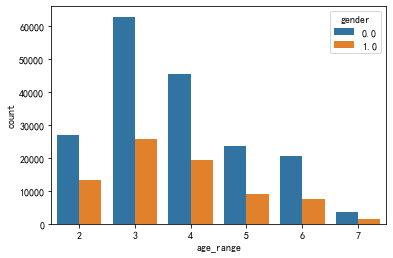

In [152]:
# 对建立好的特征表的各个特征再进行分析

# 对age和gender进行分析，和前面不同，这里是填充之后的
sns.countplot(x='age_range', order=[2, 3, 4, 5, 6, 7], hue='gender', data=split_train_data_feature)

In [ ]:
# 对age和gender进行分析
sns.countplot(x='gender', order=[0, 1], hue='age_range', data=split_train_data_feature)
# 同样由数据分布可知，男女性别的年龄段分布几乎是一致的

In [73]:
# 进行特征筛选
from sklearn.feature_selection import SelectKBest,f_classif,chi2
label = split_train_data_feature['label']
features_name = split_train_data_feature.drop(columns=['user_id','merchant_id','label']).columns
selector = SelectKBest(f_classif, k = 72)
selector.fit(split_train_data_feature.drop(columns=['user_id','merchant_id','label']), label)
scores = -np.log10(selector.pvalues_)
scores

D:\coding_tool\Anaconda\envs\torch1.2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


array([1.97367788e+01, 2.10911039e+01, 7.55234896e+01, 3.96408228e+01,
       1.55595748e+01, 3.27367310e+01, 6.93951560e+01, 4.10130372e+00,
       1.39347597e+02, 2.29784772e+01, 7.46943216e+01, 2.34104243e+02,
       2.40036177e+02, 2.03440637e+02, 1.48150992e+02, 1.21853167e+02,
       3.98055692e+00, 1.02482474e+02, 5.24197241e+01, 1.50408427e-01,
       2.92042773e-01, 9.78362448e+00, 1.47129750e-01, 8.23908194e+01,
       8.43022508e+01, 7.23587976e+01, 7.96103515e+01, 6.81353662e+01,
       8.25544070e+01, 7.22385554e+01, 1.32786932e+02, 7.81250496e+01,
       8.41354672e+01, 2.13717919e+02, 1.94092550e+02, 2.41634441e-01,
       3.15294099e+02, 2.43684442e+02, 4.16172244e+01, 9.71870008e+01,
       1.45594504e+02, 1.24726964e+01, 4.08061193e+00, 1.45151243e+01,
       1.18740130e+01, 1.61990499e+01, 1.02723702e-01,            inf,
                  inf, 1.37782438e+01,            inf,            inf,
       1.08558745e+00,            inf, 1.57218806e+02,            inf,
      

In [74]:
# 各个特征的得分
indices = np.argsort(scores)[::-1]
print('feature importance')
for f in range(len(scores)):
    print("%0.2f %s" % (scores[indices[f]], features_name[indices[f]]))


feature importance
inf merchant_user_logs
inf merchant_user_items
inf user_merchant_items
inf user_merchant_days
inf user_merchant_clicks
inf user_merchant_purchases
inf user_merchant_logs
inf user_merchant_cats
inf merchant_user_purchases
inf merchant_user_cats
315.29 merchant_days_per_user
297.39 merchant_user_clicks
272.77 merchant_user_days
243.68 merchant_clicks_per_user
240.04 user_cats_per_store
234.10 user_items_per_store
213.72 merchant_items_per_user
203.44 user_days_per_store
194.09 merchant_cats_per_user
157.22 user_merchant_collections
148.15 user_logs_per_store
145.59 merchant_collections_per_user
139.35 user_purchases
135.48 merchant_user_collections
132.79 merchant_purchases
121.85 user_clicks_per_store
102.48 user_purchases_per_store
97.19 merchant_purchases_per_user
84.30 merchant_cats
84.14 merchant_logs
82.55 merchant_clicks
82.39 merchant_items
79.61 merchant_days
78.13 merchant_collections
75.52 user_items
74.69 user_logs
72.36 merchant_brands
72.24 merchant_carts

In [132]:
# 丢掉相关性极低的特征，以得到最后的训练特征
split_train_data_feature.drop(columns=['user_merchant_collection_purchase_ratio','avg_gender','user_log_purchase_ratio','user_click_purchase_ratio',
                                      'merchant_brands_per_user','user_collection_purchase_ratio','merchant_user_collection_purchase_ratio'],inplace=True)

In [75]:
print(split_train_data_feature.shape)
split_train_data_feature_columns = split_train_data_feature.columns

(260864, 75)


In [196]:
# 进行正样本复制(复制一倍的正样本)
positive_split_train_data_feature = split_train_data_feature[split_train_data_feature['label'] == 1]
print(positive_split_train_data_feature.shape)
copy_positive_split_train_data_feature = pd.DataFrame(np.repeat(positive_split_train_data_feature.values,1,axis=0))
print(copy_positive_split_train_data_feature.shape)
split_train_data_feature = pd.DataFrame(np.concatenate((split_train_data_feature.values, copy_positive_split_train_data_feature.values)),columns=split_train_data_feature_columns)
print(split_train_data_feature.shape)

(15952, 75)
(15952, 75)
(276816, 75)


In [76]:
# 构建模型随机切分训练集进行训练

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [77]:
# 准备训练集与测试集
label = split_train_data_feature['label']
data = split_train_data_feature.drop(columns=['user_id','merchant_id','label'],axis=1)
label.head(10)

# 训练集和测试集切分,确保生成随机数种子，并且训练和测试的样本分配尽量均衡
train_data, validation_data, train_label, validation_label = train_test_split(data,label, test_size = 0.2,random_state = 10)
print(train_data.shape)
print(train_label.shape)
print(validation_data.shape)
print(validation_label.shape)
# 让训练和测试集的两个数据分布均等
print(np.sum(train_label==1)/len(train_label))
print(np.sum((validation_label)==1)/len(validation_label))

(208691, 72)
(208691,)
(52173, 72)
(52173,)
0.06118136383456881
0.061027734652023075


In [64]:
# 采用逻辑线性回归模型
logit_model = LogisticRegression(solver='liblinear')
# 网络训练
logit_model.fit(train_data, train_label)
logit_predict_label = logit_model.predict(validation_data)
logit_predict_prob = logit_model.predict_proba(validation_data)
print(logit_predict_label[0:20])
print(logit_predict_prob[0:20])
score = accuracy_score(validation_label, logit_predict_label)
print(score)

# 查看逻辑线性回归模型的系数
print(f'logit_model.coefficiency: {logit_model.coef_}')
print(f'logit_model.interception: {logit_model.intercept_}')

D:\coding_tool\Anaconda\envs\torch1.2\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.980853   0.019147  ]
 [0.91185055 0.08814945]
 [0.9378171  0.0621829 ]
 [0.9263131  0.0736869 ]
 [0.94962299 0.05037701]
 [0.93643554 0.06356446]
 [0.928048   0.071952  ]
 [0.88611461 0.11388539]
 [0.94684672 0.05315328]
 [0.94651345 0.05348655]
 [0.90478044 0.09521956]
 [0.97010739 0.02989261]
 [0.9625666  0.0374334 ]
 [0.96561407 0.03438593]
 [0.89743264 0.10256736]
 [0.94319789 0.05680211]
 [0.90021749 0.09978251]
 [0.91141647 0.08858353]
 [0.90735374 0.09264626]
 [0.95795073 0.04204927]]
0.9383014202748549
logit_model.coefficiency: [[-1.41575683e-01 -2.54883083e-02  1.32670612e-03  6.07542749e-03
  -2.52691788e-02  1.80102261e-03 -4.11350677e-03 -1.13293900e-02
   2.10337423e-02 -1.23672713e-03  4.35411842e-03 -3.63340110e-02
  -4.93161363e-02 -5.22513226e-02 -4.10478142e-02 -2.85673928e-02
  -7.88982419e-04 -1.10599903e-02 -6.31448685e-04 -1.14163301e-02
  -7.66099017e-03  4.04907399e-05 -6.10757324e-05  3.00002603e-05
   6.02527427e-0

In [83]:
# 验证一下逻辑回归线性模型的平均正确率，用交叉验证的方式
logit_model = LogisticRegression(random_state=10, solver='liblinear')
# 采用五折的交叉验证
scores = model_selection.cross_val_score(logit_model, data, label, cv=5)
print(f'平均正确率为{scores.mean()}')

平均正确率为0.9387228592704467


In [125]:
# 决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_data, train_label)
tree_predict_proba = tree.predict_proba(validation_data)
print(tree_predict_proba[0:20])
print("Accuracy on train set: {:.5f}".format(tree.score(train_data, train_label))) 
print("Accuracy on test set: {:.5f}".format(tree.score(validation_data, validation_label)))

[[0.85701316 0.14298684]
 [0.96613696 0.03386304]
 [0.96613696 0.03386304]
 [0.93358548 0.06641452]
 [0.943651   0.056349  ]
 [0.95319188 0.04680812]
 [0.943651   0.056349  ]
 [0.95319188 0.04680812]
 [0.84893947 0.15106053]
 [0.943651   0.056349  ]
 [0.90120482 0.09879518]
 [0.943651   0.056349  ]
 [0.943651   0.056349  ]
 [0.93358548 0.06641452]
 [0.943651   0.056349  ]
 [0.96613696 0.03386304]
 [0.95319188 0.04680812]
 [0.96613696 0.03386304]
 [0.95319188 0.04680812]
 [0.84893947 0.15106053]]
Accuracy on train set: 0.93883
Accuracy on test set: 0.93895


In [85]:
# 随机森林模型
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=15, random_state=2)
forest.fit(train_data, train_label)
forest_predict_proba = forest.predict_proba(validation_data)
print(forest_predict_proba[:20])
print("Accuracy on training set: {:.5f}".format(forest.score(train_data, train_label))) 
print("Accuracy on test set: {:.5f}".format(forest.score(validation_data, validation_label)))

[[0.86666667 0.13333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.86666667 0.13333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [1.         0.        ]
 [0.86666667 0.13333333]
 [1.         0.        ]
 [0.93333333 0.06666667]
 [1.         0.        ]
 [0.86666667 0.13333333]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.93333333 0.06666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.93333333 0.06666667]
 [0.73333333 0.26666667]]
Accuracy on training set: 0.99469
Accuracy on test set: 0.93776


In [168]:
# 梯度提升回归树
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(train_data, train_label)
gb_predict_proba = gbrt.predict_proba(validation_data)
print(gb_predict_proba[0:20])
print("Accuracy on training set: {:.5f}".format(gbrt.score(train_data, train_label)))
print("Accuracy on test set: {:.5f}".format(gbrt.score(validation_data, validation_label)))

[[0.90531428 0.09468572]
 [0.96918443 0.03081557]
 [0.96148467 0.03851533]
 [0.93008258 0.06991742]
 [0.93525746 0.06474254]
 [0.93946571 0.06053429]
 [0.94941508 0.05058492]
 [0.95203932 0.04796068]
 [0.82202009 0.17797991]
 [0.94122276 0.05877724]
 [0.91217042 0.08782958]
 [0.95323308 0.04676692]
 [0.91336383 0.08663617]
 [0.94523737 0.05476263]
 [0.95720093 0.04279907]
 [0.96334778 0.03665222]
 [0.9570302  0.0429698 ]
 [0.96691686 0.03308314]
 [0.94734744 0.05265256]
 [0.79009075 0.20990925]]
Accuracy on training set: 0.93897
Accuracy on test set: 0.93882


In [169]:
# 多层感知机模型(神经网络)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=0.1,random_state=0,hidden_layer_sizes=[10,10], max_iter=1000).fit(train_data, train_label)
mlp_predict_label = mlp.predict(validation_data)
mlp_predict_proba = mlp.predict_proba(validation_data)
print(mlp_predict_proba[0:20])
Score = accuracy_score(validation_label, mlp_predict_label)
print(Score)

[[0.82224517 0.17775483]
 [0.97172247 0.02827753]
 [0.96828049 0.03171951]
 [0.91604373 0.08395627]
 [0.92975118 0.07024882]
 [0.94965418 0.05034582]
 [0.95459216 0.04540784]
 [0.95585199 0.04414801]
 [0.8830192  0.1169808 ]
 [0.93784069 0.06215931]
 [0.88691579 0.11308421]
 [0.96699813 0.03300187]
 [0.90858159 0.09141841]
 [0.93355443 0.06644557]
 [0.9584496  0.0415504 ]
 [0.96394867 0.03605133]
 [0.9452428  0.0547572 ]
 [0.97031748 0.02968252]
 [0.95072435 0.04927565]
 [0.88149826 0.11850174]]
0.9388189293312633


D:\coding_tool\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [78]:
split_train_data_feature.shape

(260864, 75)

In [133]:
# XGBOOST算法做分类器
import xgboost as xgb
xgb_predict_model = xgb.XGBClassifier(
    max_depth = 7,
    eta = 0.1,
    n_estimators = 200,
    min_child_weight = 300,
    subsample = 0.8,
    colsample_bytree = 0.8,
    scale_pos_weight= 6.5,
#     reg_lambda = 8,
#     reg_alpha = 8,
    eval_metric = 'auc',
    seed=1440,
    gamma = 40,
)
xgb_predict_model.fit(
    train_data, 
    train_label, 
    eval_set=[(train_data, train_label),(validation_data, validation_label)],
    verbose = True,
    early_stopping_rounds = 30
)
xgb_predict_model.fit(train_data, train_label)

[0]	validation_0-auc:0.65832	validation_1-auc:0.62718
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.67077	validation_1-auc:0.63941
[2]	validation_0-auc:0.67479	validation_1-auc:0.64379
[3]	validation_0-auc:0.67812	validation_1-auc:0.64620
[4]	validation_0-auc:0.68029	validation_1-auc:0.64807
[5]	validation_0-auc:0.68396	validation_1-auc:0.65137
[6]	validation_0-auc:0.68635	validation_1-auc:0.65239
[7]	validation_0-auc:0.68756	validation_1-auc:0.65341
[8]	validation_0-auc:0.68938	validation_1-auc:0.65388
[9]	validation_0-auc:0.69110	validation_1-auc:0.65450
[10]	validation_0-auc:0.69201	validation_1-auc:0.65521
[11]	validation_0-auc:0.69319	validation_1-auc:0.65532
[12]	validation_0-auc:0.69479	validation_1-auc:0.65678
[13]	validation_0-auc:0.69534	validation_1-auc:0.65705
[14]	validation_0-auc:0.69681	validation_1-auc:0.65793
[15]	validation_0-auc:0.6976

[146]	validation_0-auc:0.75166	validation_1-auc:0.67436
[147]	validation_0-auc:0.75172	validation_1-auc:0.67439
[148]	validation_0-auc:0.75204	validation_1-auc:0.67429
[149]	validation_0-auc:0.75213	validation_1-auc:0.67428
[150]	validation_0-auc:0.75225	validation_1-auc:0.67426
[151]	validation_0-auc:0.75237	validation_1-auc:0.67424
[152]	validation_0-auc:0.75264	validation_1-auc:0.67430
[153]	validation_0-auc:0.75264	validation_1-auc:0.67430
[154]	validation_0-auc:0.75279	validation_1-auc:0.67435
[155]	validation_0-auc:0.75299	validation_1-auc:0.67431
[156]	validation_0-auc:0.75315	validation_1-auc:0.67429
[157]	validation_0-auc:0.75343	validation_1-auc:0.67440
[158]	validation_0-auc:0.75350	validation_1-auc:0.67440
[159]	validation_0-auc:0.75362	validation_1-auc:0.67443
[160]	validation_0-auc:0.75405	validation_1-auc:0.67460
[161]	validation_0-auc:0.75420	validation_1-auc:0.67477
[162]	validation_0-auc:0.75420	validation_1-auc:0.67477
[163]	validation_0-auc:0.75443	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1,
              eval_metric='auc', gamma=40, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=300, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, random_state=1440, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=6.5, seed=1440, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
# 根据xgboost的内置算法得到训练过程中各个特征的重要程度
feature_importance = pd.Series(xgb_predict_model.feature_importances_, train_data.columns)
feature_importance.sort_values()

[0.03663202 0.04030201 0.06112541 0.04698076 0.04258079 0.03077646
 0.04077524 0.03513709 0.03901833 0.03519695 0.04313658 0.04256029
 0.04655525 0.04466228 0.03736295 0.0374885  0.04050864 0.0426376
 0.03482958 0.03789596 0.0360717  0.03652048 0.04096718 0.03508181
 0.03519618]


In [134]:
# 判断一下模型的过拟合校正，主要是看一下validation中预测的label为1和真实的label为的比值为多少
print(np.sum(xgb_predict_model.predict(validation_data)))
print(f'真实的label为1的个数{np.sum(validation_label)}')
print(np.max(xgb_predict_model.predict_proba(validation_data)))
print(np.min(xgb_predict_model.predict_proba(validation_data)))
print(np.mean(xgb_predict_model.predict_proba(validation_data)))
print(np.sum(xgb_predict_model.predict(validation_data) == validation_label)/len(validation_label))

3053
真实的label为1的个数3184
0.9539686
0.0460314
0.5
0.9022674563471528


In [180]:
# 自己写的一个基于Conv1d的神经网络分类器
import torch
from torch.utils.data import Dataset

# 定义一个可以用来分batch的类
class GetLoader(Dataset):
    
    """初始化函数，得到原始数据"""
    def __init__(self, data_source, data_label):
        super(GetLoader, self).__init__()
        self.data = data_source
        self.label = data_label
        self.data = self.data.astype(np.float32)
        self.data = torch.from_numpy(self.data)
        
    """返回传入的数据的长度"""
    def __len__(self):
        return len(self.data)
    
    """定义取数据的函数"""
    def __getitem__(self, index):
        data = self.data[index]
        labels = self.label[index]
        return data,labels


In [181]:
train_data = np.array(train_data)
train_label  = np.array(train_label)
validation_data = np.array(validation_data)
validation_label = np.array(validation_label)

In [182]:
from torch.utils.data import DataLoader

train_loader = GetLoader(train_data, train_label)
validation_loader = GetLoader(validation_data, validation_label)
train_datas = DataLoader(train_loader, batch_size=64, shuffle=True, drop_last=False)
validation_datas = DataLoader(validation_loader, batch_size = 256, shuffle=True, drop_last=False)

In [232]:
# 定义网络
import torch.nn as nn


class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv1d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm1d(outchannel),
            nn.ReLU(),
            nn.Conv1d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm1d(outchannel)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv1d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(outchannel)
            )
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = self.relu(out)
        return out


class ResNet18(nn.Module):
    """初始化网络"""
    def __init__(self, ResidualBlock):
        super(ResNet18, self).__init__()

        # 一开始进行的升维和通道的增广处理
        self.fc0 = nn.Sequential(
            nn.Linear(45, 512, bias=False),
            nn.ReLU(),
        ) 
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.layer2 = self.make_layer(ResidualBlock, 64, 64, 2, stride=1)
        self.layer3 = self.make_layer(ResidualBlock, 64, 128, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 128, 2, stride=2)
        self.layer5 = self.make_layer(ResidualBlock, 128, 256, 2, stride=2)
        self.layer6 = self.make_layer(ResidualBlock, 256, 512, 2, stride=2)
        self.avg_poold1d = nn.AvgPool1d(32)
        self.fc1 = nn.Linear(512, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.fc0(x)
        out = out.unsqueeze(1)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.avg_poold1d(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

    def make_layer(self, block, inchannel, outchannel, num_blocks, stride):
        layers = []
        for i in range(1, num_blocks):
            layers.append(block(inchannel, outchannel, stride))
        return nn.Sequential(*layers)

In [233]:
net = ResNet18(ResidualBlock)

In [ ]:
# 开始训练网络
num_epoch = 100
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.99))
loss_function = nn.CrossEntropyLoss()

for epoch in range(num_epoch):
    print('epoch = %d' % epoch)
    for i,(data ,label) in enumerate(train_datas):
        x = net(data)
        loss = loss_function(x, label.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('loss = %.5f' % loss)

epoch = 0
loss = 0.64365
loss = 0.33532
loss = 0.22964
loss = 0.24621
loss = 0.21808
loss = 0.35853
loss = 0.34306
loss = 0.19534
loss = 0.25143
loss = 0.21368


In [97]:
# 在真实的测试数据上进行预测,组建测试数据上的特征

# 加入基本的用户信息
split_test_data_feature = pd.merge(split_test_data, user_info, left_on = 'user_id',right_on = 'user_id',how='left')

# 加入全局的用户特征画像
split_test_data_feature = pd.merge(split_test_data_feature, global_user_feature, left_on = 'user_id', right_on = 'user_id', how='left')

# 加入全局的商家特征画像
split_test_data_feature = pd.merge(split_test_data_feature, global_merchant_feature, left_on = 'merchant_id', right_on = 'merchant_id', how='left')

# 加入全局的商家针对用户的特征画像
split_test_data_feature = pd.merge(split_test_data_feature, user_merchant_feature, left_on = ['user_id','merchant_id'], right_on = ['user_id','merchant_id'], how='left')


In [98]:
split_test_data_feature_backup = split_test_data_feature.copy()   # 拷贝一份数据

In [99]:
# 进行年龄和性别的缺失值填充(缺失值填充可以补充)
split_test_data_feature['age_range'].replace(-1, np.nan, inplace=True)
split_test_data_feature['gender'].replace(-1, np.nan, inplace=True)
split_test_data_feature.fillna(method='ffill', inplace=True)
split_test_data_feature.fillna(method='bfill', inplace=True)

In [101]:
# 对user_merchant_feature进行一些局部改进

# 以用户为中心进行的特征评估

# 首先是比例特征
split_test_data_feature['user_merchant_click_purchase_ratio'] = split_test_data_feature['user_click_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_clicks']
split_test_data_feature['user_merchant_collection_purchase_ratio'] = split_test_data_feature['user_collection_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_collections']
split_test_data_feature['user_merchant_cart_purchase_ratio'] = split_test_data_feature['user_cart_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_carts']
split_test_data_feature['user_merchant_log_purchase_ratio'] = split_test_data_feature['user_log_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_logs']
# 再是插值评估特征(可用可不用)
# split_test_data_feature['user_merchant_items'] = split_test_data_feature['user_merchant_items'] - split_test_data_feature['user_items_per_store']
# split_test_data_feature['user_merchant_cats'] = split_test_data_feature['user_merchant_cats'] - split_test_data_feature['user_cats_per_store']
# split_test_data_feature['user_merchant_brands'] = split_test_data_feature['user_merchant_brands'] - split_test_data_feature['merchant_brands_per_user']
# split_test_data_feature['user_merchant_days'] = split_test_data_feature['user_merchant_days'] - split_test_data_feature['user_days_per_store']
# split_test_data_feature['user_merchant_clicks'] = split_test_data_feature['user_merchant_clicks'] - split_test_data_feature['user_clicks_per_store']
# split_test_data_feature['user_merchant_carts'] = split_test_data_feature['user_merchant_carts'] - split_test_data_feature['user_carts_per_store']
# split_test_data_feature['user_merchant_purchases'] = split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_purchases_per_store']
# split_test_data_feature['user_merchant_collections'] = split_test_data_feature['user_merchant_collections'] - split_test_data_feature['user_collections_per_store']
# split_test_data_feature['user_merchant_logs'] = split_test_data_feature['user_merchant_logs'] - split_test_data_feature['user_logs_per_store']


# 以商家为中心进行的特征评估

# 首先是比例特征
split_test_data_feature['merchant_user_click_purchase_ratio'] = split_test_data_feature['merchant_click_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_clicks']
split_test_data_feature['merchant_user_collection_purchase_ratio'] = split_test_data_feature['merchant_collection_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_collections']
split_test_data_feature['merchant_user_cart_purchase_ratio'] = split_test_data_feature['merchant_cart_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_carts']
split_test_data_feature['merchant_user_log_purchase_ratio'] = split_test_data_feature['merchant_log_purchase_ratio'] * split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['user_merchant_logs']
# 再是插值评估特征
split_test_data_feature['merchant_user_items'] = split_test_data_feature['user_merchant_items'] - split_test_data_feature['merchant_items_per_user']
split_test_data_feature['merchant_user_cats'] = split_test_data_feature['user_merchant_cats'] - split_test_data_feature['merchant_cats_per_user']
split_test_data_feature['merchant_user_days'] = split_test_data_feature['user_merchant_days'] - split_test_data_feature['merchant_days_per_user']
split_test_data_feature['merchant_user_clicks'] = split_test_data_feature['user_merchant_clicks'] - split_test_data_feature['merchant_clicks_per_user']
split_test_data_feature['merchant_user_carts'] = split_test_data_feature['user_merchant_carts'] - split_test_data_feature['merchant_carts_per_user']
split_test_data_feature['merchant_user_purchases'] = split_test_data_feature['user_merchant_purchases'] - split_test_data_feature['merchant_purchases_per_user']
split_test_data_feature['merchant_user_collections'] = split_test_data_feature['user_merchant_collections'] - split_test_data_feature['merchant_collections_per_user']
split_test_data_feature['merchant_user_logs'] = split_test_data_feature['user_merchant_logs'] - split_test_data_feature['user_logs_per_store']


In [135]:
# 特征选择模块和训练过程中保持一致即可
# 丢掉相关性极低的特征，以得到最后的训练特征
split_test_data_feature.drop(columns=['user_merchant_collection_purchase_ratio','avg_gender','user_log_purchase_ratio','user_click_purchase_ratio',
                                      'merchant_brands_per_user','user_collection_purchase_ratio','merchant_user_collection_purchase_ratio'],inplace=True)

In [102]:
# 丢掉不相关的维度，放到模型中进行预测
split_test_data_feature = split_test_data_feature.drop(columns=['user_id','merchant_id','prob'])

In [136]:
# 放到模型中进行预测，生成结果
test_predict_prob = xgb_predict_model.predict_proba(split_test_data_feature)
split_test_data['xgb_boost_prob'] = test_predict_prob[:,1]
split_test_data.head(10)

,user_id,merchant_id,prob,xgb_boost_prob
0,163968,4605,NaN,0.170416
1,360576,1581,NaN,0.194349
2,98688,1964,NaN,0.122302
3,98688,3645,NaN,0.143996
4,295296,3361,NaN,0.186385
5,33408,98,NaN,0.166059
6,230016,1742,NaN,0.199254
7,164736,598,NaN,0.118922
8,164736,1963,NaN,0.117331
9,164736,2634,NaN,0.165378


In [137]:
# 结果取出进行保存
choose_column = ['user_id','merchant_id','xgb_boost_prob']
submission_df = split_test_data.loc[:,choose_column]
submission_df.rename(columns={'xgb_boost_prob':'prob'},inplace=True)
submission_df.head(10)

,user_id,merchant_id,prob
0,163968,4605,0.170416
1,360576,1581,0.194349
2,98688,1964,0.122302
3,98688,3645,0.143996
4,295296,3361,0.186385
5,33408,98,0.166059
6,230016,1742,0.199254
7,164736,598,0.118922
8,164736,1963,0.117331
9,164736,2634,0.165378


In [138]:
# 读入相应文件
submission_df.to_csv(path_or_buf = './prediction1.csv',index=False)